<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

yA = a * xA + b <br>
yB = c * exp(yA) + d * xB + e <br>
를 만족하는 데이터에서 a, b, c, d, e 를 발견합시다. 초기 웨이트에 따라 학습이 잘 않될 수도 있으니 여러번 실행해 봅시다.

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
xA (InputLayer)                 (None, 1)            0                                            
__________________________________________________________________________________________________
yA (Dense)                      (None, 1)            2           xA[0][0]                         
__________________________________________________________________________________________________
exp (Lambda)                    (None, 1)            0           yA[0][0]                         
__________________________________________________________________________________________________
xB (InputLayer)                 (None, 1)            0                                            
__________________________________________________________________________________________________
concat (Co

800/800 [==============================] - 0s 132us/step - loss: 0.1381 - yA_loss: 0.1352 - yB_loss: 0.0029 - val_loss: 0.1349 - val_yA_loss: 0.1321 - val_yB_loss: 0.0027
Epoch 80/200
800/800 [==============================] - 0s 115us/step - loss: 0.1315 - yA_loss: 0.1292 - yB_loss: 0.0024 - val_loss: 0.1285 - val_yA_loss: 0.1261 - val_yB_loss: 0.0025
Epoch 81/200
800/800 [==============================] - 0s 117us/step - loss: 0.1253 - yA_loss: 0.1230 - yB_loss: 0.0022 - val_loss: 0.1223 - val_yA_loss: 0.1203 - val_yB_loss: 0.0020
Epoch 82/200
800/800 [==============================] - 0s 112us/step - loss: 0.1193 - yA_loss: 0.1172 - yB_loss: 0.0021 - val_loss: 0.1166 - val_yA_loss: 0.1140 - val_yB_loss: 0.0025
Epoch 83/200
800/800 [==============================] - 0s 116us/step - loss: 0.1133 - yA_loss: 0.1112 - yB_loss: 0.0021 - val_loss: 0.1106 - val_yA_loss: 0.1085 - val_yB_loss: 0.0021
Epoch 84/200
800/800 [==============================] - 0s 112us/step - loss: 0.1076 - yA_los

Epoch 163/200
800/800 [==============================] - 0s 125us/step - loss: 8.9642e-08 - yA_loss: 4.0173e-09 - yB_loss: 8.5624e-08 - val_loss: 6.5194e-07 - val_yA_loss: 5.1705e-09 - val_yB_loss: 6.4677e-07
Epoch 164/200
800/800 [==============================] - 0s 121us/step - loss: 1.1915e-06 - yA_loss: 3.6819e-09 - yB_loss: 1.1879e-06 - val_loss: 2.1003e-08 - val_yA_loss: 1.4325e-09 - val_yB_loss: 1.9571e-08
Epoch 165/200
800/800 [==============================] - 0s 118us/step - loss: 1.8155e-07 - yA_loss: 1.2299e-09 - yB_loss: 1.8032e-07 - val_loss: 4.2145e-09 - val_yA_loss: 5.7247e-10 - val_yB_loss: 3.6420e-09
Epoch 166/200
800/800 [==============================] - 0s 135us/step - loss: 7.3888e-08 - yA_loss: 4.1498e-10 - yB_loss: 7.3473e-08 - val_loss: 1.7124e-07 - val_yA_loss: 3.9748e-10 - val_yB_loss: 1.7085e-07
Epoch 167/200
800/800 [==============================] - 0s 121us/step - loss: 2.5892e-08 - yA_loss: 2.3257e-10 - yB_loss: 2.5659e-08 - val_loss: 6.9373e-09 - val_y

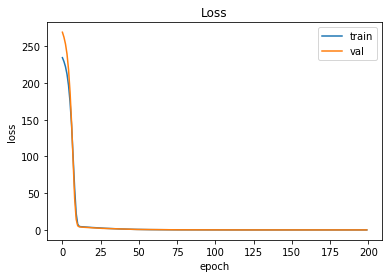

yA_weights
 [array([[1.9999969]], dtype=float32), array([0.9999825], dtype=float32)] 

yB_weights
 [array([[2.0000434],
       [3.0000079]], dtype=float32), array([0.99998426], dtype=float32)]


In [11]:
from keras import layers, models
import numpy as np
import keras.backend as K
import matplotlib.pyplot as plt
%matplotlib inline

a = 2; b = 1; c = 2; d = 3; e = 1

x_train_A = np.random.rand(1000,1) * 2 - 1
x_train_B = np.random.rand(1000,1) * 2 - 1
y_train_A = a * x_train_A + b
y_train_B = c * np.exp(y_train_A) + d * x_train_B + e

xA = layers.Input((1,), name='xA')
xB = layers.Input((1,), name='xB')
yA = layers.Dense(1, name='yA')(xA)
h1 = layers.Lambda(lambda x: K.exp(x), name='exp')(yA)
h2 = layers.Concatenate(name='concat')([h1, xB])
yB = layers.Dense(1, name='yB')(h2)

model = models.Model([xA, xB], [yA, yB])
model.summary()

model.compile('adam', 'mse')
hist = model.fit([x_train_A, x_train_B], [y_train_A, y_train_B],
                 batch_size=8, epochs=200, validation_split=0.2)

plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc=0)
plt.show()

yA_weights = model.get_layer('yA').get_weights()
yB_weights = model.get_layer('yB').get_weights()
print('yA_weights\n', yA_weights, '\n')
print('yB_weights\n', yB_weights)